# **Machine Learning Tutorial - Part-1**

## **Linear Regression**

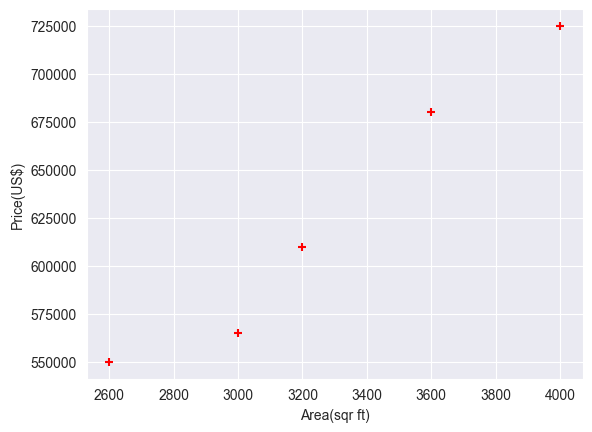

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

df = pd.read_csv("homeprices.csv")


plt.xlabel('Area(sqr ft)')
plt.ylabel('Price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.show()

In [9]:
df = pd.read_csv("homeprices.csv")

reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
reg.predict([[3300]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

np.float64(180616.43835616432)

In [12]:
d = pd.read_csv('areas.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [17]:
p = reg.predict(d[['area']])
d['price'] = p
d.to_csv("prediction.csv", index=False)

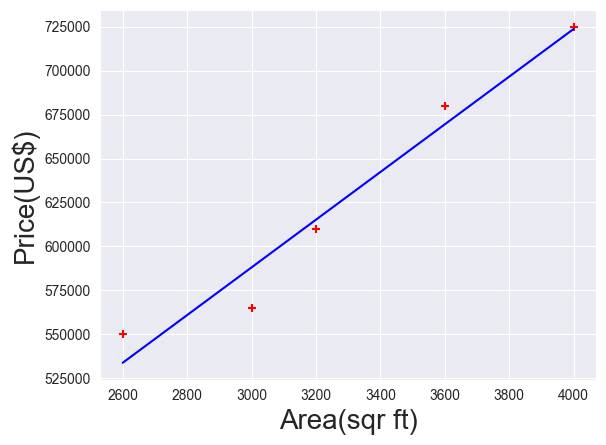

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

df = pd.read_csv("homeprices.csv")


plt.xlabel('Area(sqr ft)', fontsize=20)
plt.ylabel('Price(US$)', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.96262177],
       [2.99325705]])

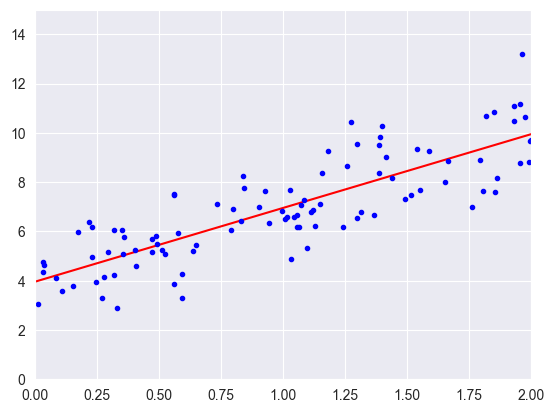

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

data = pd.read_csv("canada_per_capita_income.csv")
rg = linear_model.LinearRegression()
rg.fit(data[['year']], data[['per capita income (US$)']])
rg.predict([[2020]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

In [9]:
data

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


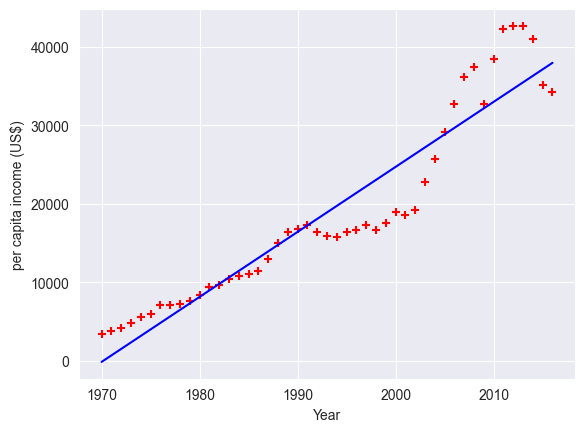

In [11]:
plt.xlabel("Year", fontsize=10)
plt.ylabel("per capita income (US$)", fontsize=10)
plt.scatter(data.year, data[["per capita income (US$)"]], color='red', marker='+')
plt.plot(data[['year']], rg.predict(data[['year']]), color='blue')
plt.show()

In [26]:
t = pd.read_csv("canada_per_capita_income.csv")
r = rg.predict([[2020]])[0][0]
with open("test.csv", "w") as f:
    f.write(f"2020, {r}\n")

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Linear Regression with multi-variable**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [29]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
print(median_bedrooms)

4


In [30]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [32]:
reg_1 = linear_model.LinearRegression()
reg_1.fit(df[['area', 'bedrooms', 'age']], df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
reg_1.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [34]:
reg_1.intercept_

np.float64(221323.0018654043)

In [35]:
reg_1.predict([[3000, 3, 40]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [37]:
112.06244194*3000+-23388.88007794*3+-3231.71790863*40+221323.0018654043

358074.9711063843

## **Gradient_descent and Cost Function**

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learing_rate = 0.001
    cost_history = []

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y - y_predicted) ])
        md = -(2/n)*sum(x*(y - y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learing_rate * md
        b_curr = b_curr - learing_rate * bd
        cost_history.append(cost)
        print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

gradient_descent(x,y)

m 0.062, b 0.018000000000000002, cost 89.0, iteration 0
m 0.122528, b 0.035592000000000006, cost 84.881304, iteration 1
m 0.181618832, b 0.052785648000000004, cost 80.955185108544, iteration 2
m 0.239306503808, b 0.069590363712, cost 77.21263768455901, iteration 3
m 0.29562421854195203, b 0.086015343961728, cost 73.64507722605434, iteration 4
m 0.35060439367025875, b 0.10206956796255283, cost 70.2443206760065, iteration 5
m 0.40427867960173774, b 0.11776180246460617, cost 67.00256764921804, iteration 6
m 0.4566779778357119, b 0.13310060678206653, cost 63.912382537082294, iteration 7
m 0.5078324586826338, b 0.14809433770148814, cost 60.966677449199324, iteration 8
m 0.5577715785654069, b 0.16275115427398937, cost 58.15869595270883, iteration 9
m 0.606524096911324, b 0.17707902249404894, cost 55.481997572035766, iteration 10
m 0.6541180926443106, b 0.1910857198675929, cost 52.9304430134884, iteration 11
m 0.7005809802869303, b 0.20477883987199186, cost 50.49818008081245, iteration 12
m 0

In [4]:
eta = 0.1
n_iterations = 1000
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[3.96554363]
 [3.11458912]]


In [15]:
import pandas as pd
import numpy as np

def gradient_descent(x, y):
    m_curr = b_curr = 0
    n = len(x)
    prev_cost = np.inf
    learing_rate = 0.001
    cost_threshold = 1e-9
    max_iterations = 100

    for x in range(max_iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum(val**2 for val in (y - y_predicted))
        if abs(prev_cost - cost) < cost_threshold:
            print(f"Converged at iteration {x}")
            break
        mb = -(2/n)*sum(x*(y - y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learing_rate * mb
        b_curr = b_curr - learing_rate * bd
        prev_cost = cost

    else:
        print(f"Max iterations {max_iterations} reached")
    print(f"m {m_curr:.4f}, b {b_curr:.4f}, cost {cost:.4f}")
    return m_curr, b_curr, x


df = pd.read_csv("test_scores.csv")
x = df['math'].values
y = df['cs'].values
gradient_descent(x,y)

Max iterations 100 reached
m 365351510924493403511579574047306338852143104.0000, b 3688502459463326895632708488468324493033472.0000, cost 3780664287274767196681558474993840330307320139646649048424287482593449122544699753736699904.0000


(np.float64(3.653515109244934e+44), np.float64(3.688502459463327e+42), 99)

In [12]:
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


## **Ridge and Lisso Regression**

In [2]:
from sklearn.linear_model import Ridge
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([8.42408028])

In [3]:
from sklearn.linear_model import Lasso
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.43408327])

In [4]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.31518421])

## **One Shot Encoding**

In [16]:
import pandas as pd

df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [17]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [18]:
merged = pd.concat([df, dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [19]:
final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [20]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [21]:
y = final.price

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [23]:
model.score(X,y)

0.9573929037221872

In [25]:
model.predict([[3400, 0, 0]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [26]:
model.predict([[2800, 0, 1]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [28]:
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [29]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder= 'passthrough')
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [31]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [33]:
model.fit(X,y)
model.predict(X)
model.predict([[0, 1, 3400]])

array([681241.6684584])

In [34]:
model.predict([[1, 0, 2800]])

array([590775.63964739])

## **Train Testing Split**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("carprices.csv")

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


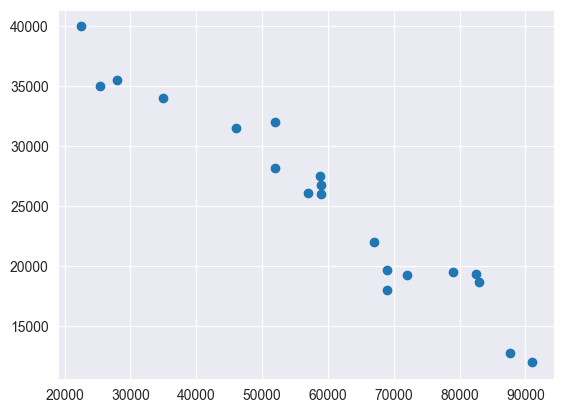

In [36]:
plt.scatter(df['Mileage'], df['Sell Price($)'])

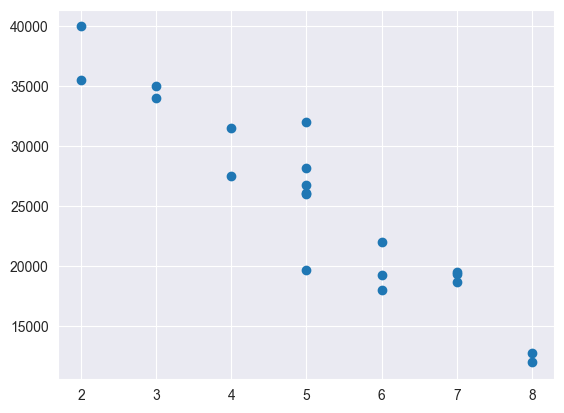

In [37]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])

In [38]:
X = df[['Mileage', 'Age(yrs)' ]]
y = df['Sell Price($)']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_train

,Mileage,Age(yrs)
10,83000,7
4,46000,4
0,69000,6
5,59000,5
6,52000,5
13,58780,4
12,59000,5
7,72000,6
3,22500,2
1,35000,3


In [40]:
len(X_train)

14

In [41]:
y_train

10    18700
4     31500
0     18000
5     26750
6     32000
13    27500
12    26000
7     19300
3     40000
1     34000
16    35500
17    19700
8     12000
19    28200
Name: Sell Price($), dtype: int64

In [42]:
len(y_train)

14

In [43]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
clf.predict(X_test)

array([14850.80373722, 22691.8483873 , 17997.98613382, 26475.89896026,
       16428.56098493, 39320.90785317])

In [46]:
clf.score(X_test, y_test)

0.877437243326477

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.3)
X1_test

,Mileage,Age(yrs)
10,83000,7
3,22500,2
6,52000,5
1,35000,3
9,67000,6
2,57000,5


## **Logistic Regression**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


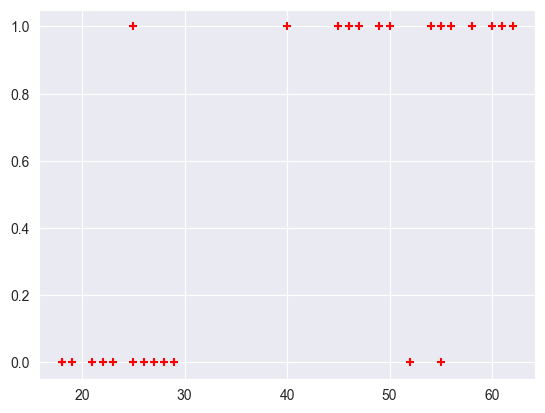

In [3]:
plt.scatter(df.age, df.bought_insurance,marker='+',color='red')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.1)

model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 1, 1])

In [7]:
model.score(X_test, y_test)

1.0

In [8]:
model.predict_proba(X_test)

array([[0.77244661, 0.22755339],
       [0.12908944, 0.87091056],
       [0.08241123, 0.91758877]])

### **Multiclass classification**

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

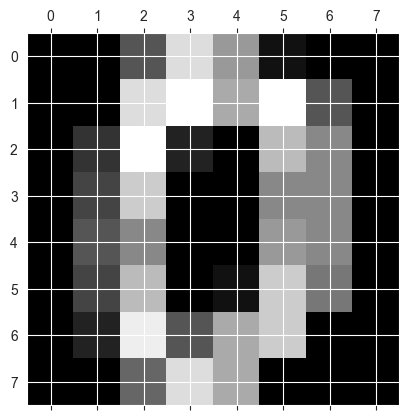

In [13]:
plt.gray()
plt.matshow(digits.images[0])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
model_1 = LogisticRegression(max_iter=10000)
model_1.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [20]:
model_1.score(X_test, y_test)

0.9694444444444444

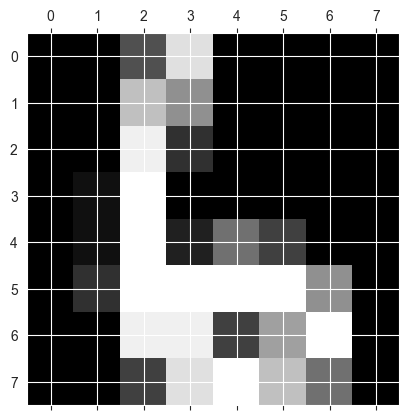

In [21]:
plt.matshow(digits.images[67])

In [22]:
digits.target[67]

np.int64(6)

In [24]:
model_1.predict([digits.data[67]])

array([6])

In [25]:
model_1.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [26]:
y_predicted = model_1.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 30,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 36]])

Text(95.72222222222221, 0.5, 'Truth')

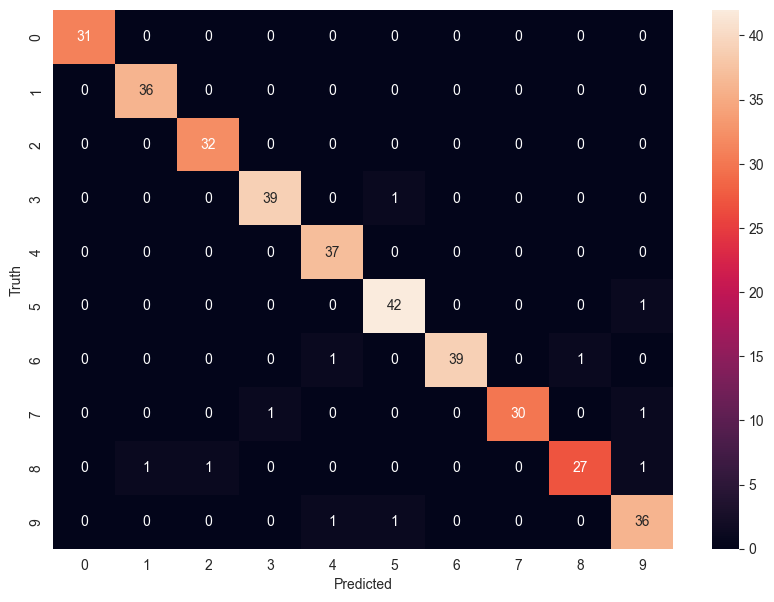

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Save Model using Pickle**

In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv("homeprices.csv")
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)
model.predict([[5000]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([913240.11571842])

In [9]:
import pickle
with open("model_pickle", "wb") as f:
    pickle.dump(model, f)

In [13]:
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)

print(mp.predict([[5000]]))

[913240.11571842]


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Decision Tree**

In [1]:
import pandas as pd
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
from sklearn.preprocessing import LabelEncoder


inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [3]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [4]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(inputs_n, target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
model.score(inputs_n, target)

1.0

In [8]:
model.predict([[2, 1, 0]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [9]:
model.predict([[2, 0, 1]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## **Support Vector**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [3]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

NameError: name 'df' is not defined

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


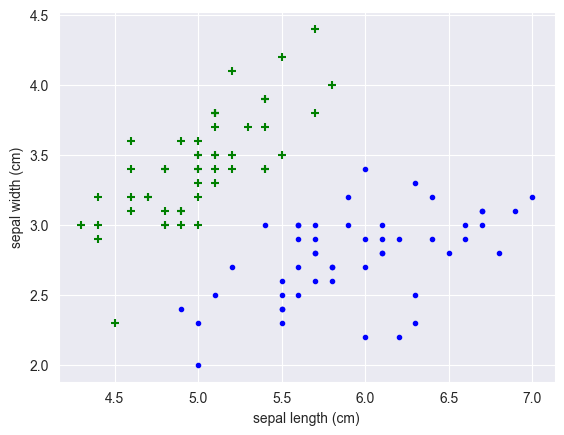

In [11]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

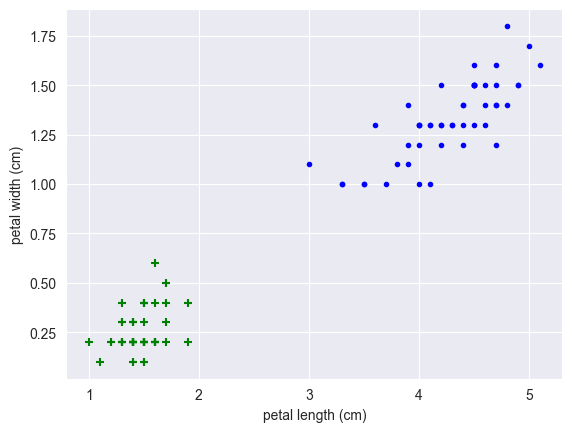

In [12]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
len(X_test)

30

In [17]:
len(X_train)

120

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
model.score(X_test, y_test)

0.9333333333333333

In [20]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])


### **1. Regularization(C)**

In [21]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [25]:
model_C1 = SVC(C=10)
model_C1.fit(X_train, y_train)
model_C1.score(X_test, y_test)

0.9333333333333333


### **2. Gamma**

In [26]:
model_G = SVC(gamma=1)
model_G.fit(X_train, y_train)
model_G.score(X_test, y_test)

0.9

In [27]:
model_G = SVC(gamma=10)
model_G.fit(X_train, y_train)
model_G.score(X_test, y_test)

0.9333333333333333

### **3.Kernel**

In [28]:
model_linear_karnel = SVC(kernel='linear')
model_linear_karnel.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
model_linear_karnel.score(X_test, y_test)

0.9666666666666667

## **Random Forest Algorithm**

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

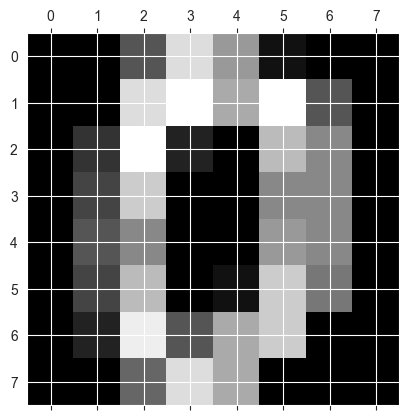

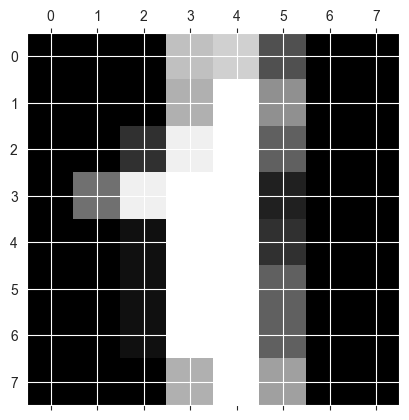

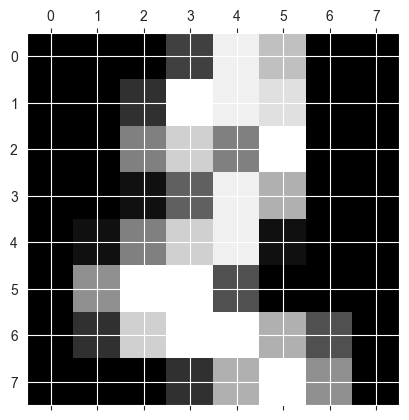

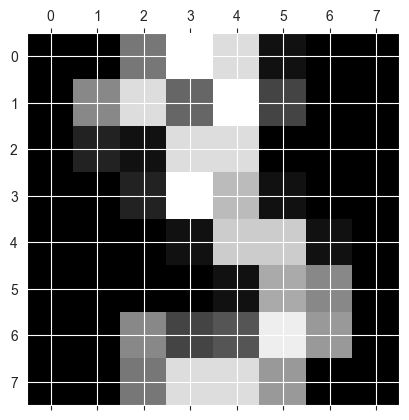

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [3]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [4]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size=0.2)

In [7]:
len(X_train)

1437

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
model.score(X_test, y_test)

0.9805555555555555

In [10]:
y_predicted = model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 24,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 31]])

Text(95.72222222222221, 0.5, 'Truth')

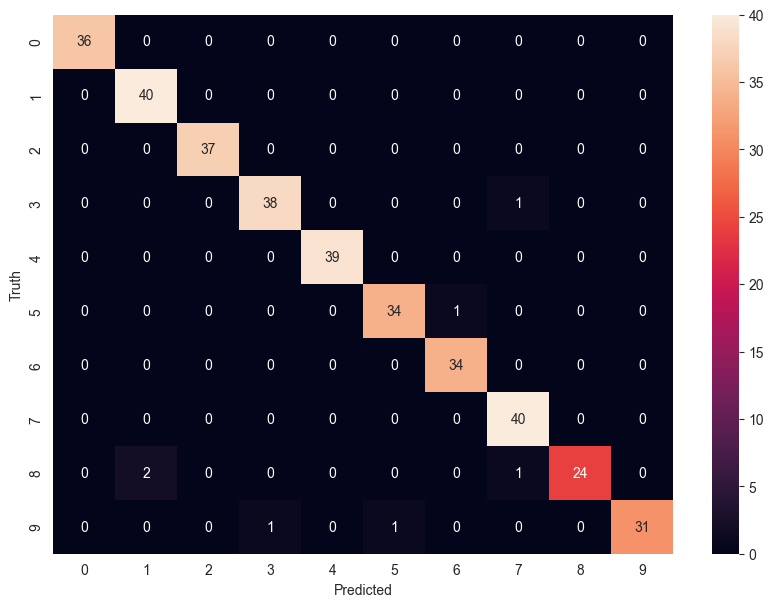

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **K-Fold Cross Validation**

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [2]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


0.9648148148148148

In [3]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.37407407407407406

In [4]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9740740740740741

In [5]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [6]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [7]:
def get_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [12]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logitics = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data, digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    scores_logitics.append(get_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, y_train, X_test, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, y_train, X_test, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, y_train, X_test, y_test))

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warni

In [13]:
scores_logitics

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [14]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [15]:
scores_rf

[0.9232053422370617, 0.9599332220367279, 0.9348914858096828]

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), digits.data, digits.target, cv=3)

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warni

array([0.89482471, 0.95325543, 0.90984975])

In [19]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target, cv=3)

array([0.38063439, 0.41068447, 0.51252087])

In [20]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target, cv=3)

array([0.93489149, 0.93989983, 0.92320534])

In [21]:
score1 = cross_val_score(RandomForestClassifier(n_estimators=5), digits.data, digits.target, cv=10)
score1

array([0.88333333, 0.88333333, 0.90555556, 0.78888889, 0.86111111,
       0.92222222, 0.9       , 0.9273743 , 0.83798883, 0.87150838])

In [22]:
score2 = cross_val_score(RandomForestClassifier(n_estimators=20), digits.data, digits.target, cv=10)
score2

array([0.91111111, 0.97222222, 0.90555556, 0.91666667, 0.93888889,
       0.95      , 0.98333333, 0.96089385, 0.91061453, 0.90502793])